# Introduction to Numpy

Content of this tutorial is delivered during the Introduction to Natural Language Processing course at Heriot-Watt University.

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. A useful quickstart tutorial can be found [here](https://docs.scipy.org/doc/numpy/user/quickstart.html). If you are already familiar with MATLAB, you might find this [tutorial](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [ ]:
import numpy as np

## Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print("type(a) = {}, a.shape = {}, a[0] = {}, a[1] = {}, a[2] = {}".format(type(a), a.shape, a[0], a[1], a[2]))
a[0] = 5                 # Change an element of the array
print(a)

type(a) = <class 'numpy.ndarray'>, a.shape = (3,), a[0] = 1, a[1] = 2, a[2] = 3
[5 2 3]


In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [ ]:
print(b.shape)
print("b[0, 0] = {}, b[0, 1] = {}, b[1, 0] = {}".format(b[0, 0], b[0, 1], b[1, 0]))

(2, 3)
b[0, 0] = 1, b[0, 1] = 2, b[1, 0] = 4


Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [ ]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.6052254  0.87428295]
 [0.115748   0.28813598]]


Create a $3 \times 2$ array and fill it with values of your preference. Then create a $4 \times 3$ array of all $8$s.

In [ ]:
# write your code here

## Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
# Create the following array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print("a = \n{}".format(a))

#alternative way to create array
a_2 = np.arange(1, 13).reshape(3,4)
print("a_2 = \n{}".format(a))

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print("b = \n{}".format(b))

a = 
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
a_2 = 
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
b = 
[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print("a[0, 1] = {}".format(a[0, 1]))
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print("a[0, 1] = {}".format(a[0, 1]))

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
# Create the following array with shape (3, 4)
a = np.arange(1, 13).reshape(3,4)
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = a[1, :]    # view of the second row of a
row_r2 = a[1:2, :]  # view of the second row of a
row_r3 = a[[1], :]  # view of the second row of a
print("row_r1 = {}, row_r1.shape = {}".format(row_r1, row_r1.shape))
print("row_r2 = {}, row_r2.shape = {}".format(row_r2, row_r2.shape))
print("row_r3 = {}, row_r3.shape = {}".format(row_r3, row_r3.shape))

row_r1 = [5 6 7 8], row_r1.shape = (4,)
row_r2 = [[5 6 7 8]], row_r2.shape = (1, 4)
row_r3 = [[5 6 7 8]], row_r3.shape = (1, 4)


In [ ]:
CE# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print("col_r1 = {}, col_r1.shape = {}".format(col_r1, col_r1.shape))
print
print("col_r2 = \n{}\ncol_r2.shape = {}".format(col_r2, col_r2.shape))

col_r1 = [ 2  6 10], col_r1.shape = (3,)
col_r2 = 
[[ 2]
 [ 6]
 [10]]
col_r2.shape = (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

In [ ]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

In [ ]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of 'a' corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

## Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print("x.dtype = {}, y.dtype = {}, z.dtype = {}".format(x.dtype, y.dtype, z.dtype))

You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

## Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

In [ ]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [ ]:
x = np.array([[1,2,3],[4,5,6]])
print(x)
print(x.T)

In [ ]:
v = np.array([[1,2,3]])
print(v)
print(v.T)

Create the following matrices  and do the multiplication? What is the problem?
$$ \begin{bmatrix}
    1  & 2 & 3  \\
    4  & 5 & 6  \\
    7  & 8 & 9  \\
    10 & 11 & 12  \\
\end{bmatrix} \times
\begin{bmatrix}
    4  & 5 & 6  \\
    7  & 8 & 9  \\
    10 & 11 & 12  \\
    13 & 14 & 15  \\
\end{bmatrix} = $$

In [ ]:
# write code here




## Broadcasting
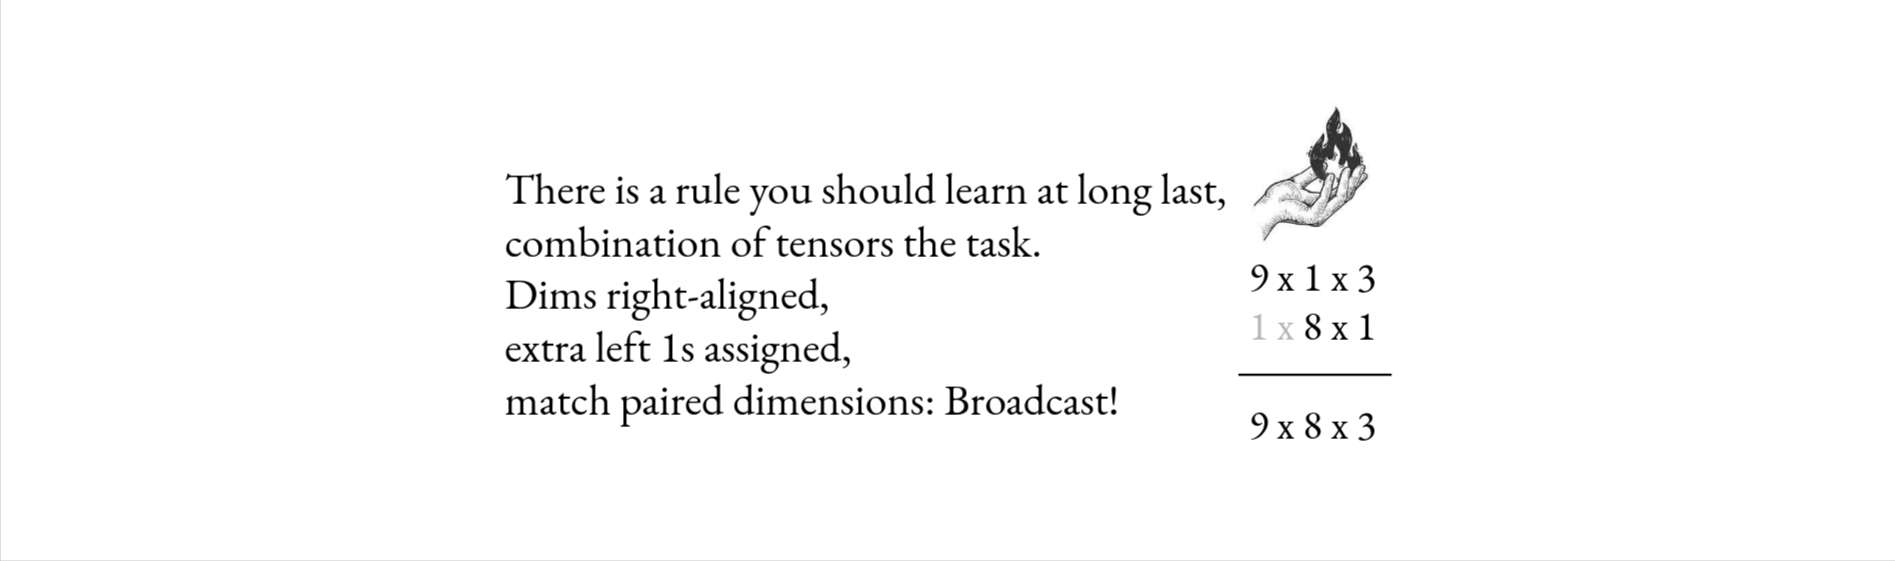

Broadcasting is an incredibly important concept to get your head around, especially when it comes to arrays and performing operations with them.

From [these NumPy docs](https://numpy.org/doc/stable/user/basics.broadcasting.html):

> *Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations.*

Yes, Python is not fast. As a scripting language, Python is a lot faster to develop with, but it is not the fastest when you are running things. However, don't worry because you don't need to start learning how to read/write C, libraries like NumPy have done all the hard work for us!

### What even is broadcasting?

The simplest example of broadcasting is where you have some array and you multiply it by some scalar.

For example:

In [ ]:
# Simple broadcasting example
cool_array = np.array([1.0, 2.0, 3.0])
scalar = 2.0
print(cool_array * scalar)

[2. 4. 6.]


As we learned above, performing that sort of operation is an element-wise multiplication. But the `scalar` wasn't an array to do the multiplication with.

What happens "behind-the-scenes" is that the `scalar` *becomes* an array with the exact same shape as the `cool_array`, and then element-wise multiplication happens.

Because NumPy is awesome, they made an illustration!

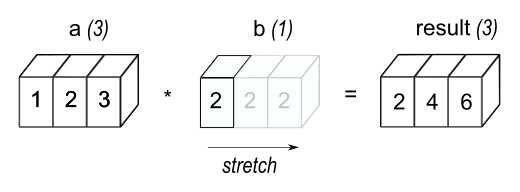

<font size=6> Before moving on to the next section, we highly highly *highly* ***highly*** recommend reading the page from NumPy about broadcasting. It's clear, concise, and it's just good! <font>

Yes, it is so important, the font is bigger.

https://numpy.org/doc/stable/user/basics.broadcasting.html

## Speeding up functions by using vector operations

One of the major benefits of using numpy arrays is being able to speed up function by reducing and removing use of for-loops.


### Example 1: Euclidean distance

In the below code block, there are two functions: `euclidean_distance_slow` and `euclidean_distance_fast`. By only using simple vector operations, implement `euclidean_distance_fast` and make sure that when you run the code block, there are no errors.

In [ ]:
!pip install hypothesis[numpy]

from hypothesis import strategies as st
import math
import time
from functools import wraps
from hypothesis.extra.numpy import arrays
import numpy as np

def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__:<20}: Took {total_time:.10f} seconds')
        return result
    return timeit_wrapper

def _create_array(size: int) -> np.ndarray:
    """Creates a random list of floats."""
    return arrays(float, size, elements=st.floats(0, 1)).example()


In [ ]:
import numpy as np

@timeit
def euclidean_distance_slow(point1: np.ndarray, point2: np.ndarray) -> float:
    """Calculate the euclidean distance using for-loop."""
    distance = 0

    for x, y in zip(point1, point2, strict=True):
      distance += (x-y) ** 2

    distance = distance ** 0.5
    return distance

@timeit
def euclidean_distance_fast(point1: np.ndarray, point2: np.ndarray) -> float:
    """Calculate the euclidean distance quickly."""
    # Add your implementation here

    raise NotImplementedError("You need to implement this function!")


point_length: int = 10000
first_point = _create_array(point_length)
second_point = _create_array(point_length)

distance_from_slow = euclidean_distance_slow(first_point, second_point)
distance_from_fast = euclidean_distance_fast(first_point, second_point)

if not np.isclose(distance_from_slow, distance_from_fast):
    raise AssertionError("The output from the slow function and the fast function are not identical. ")

### Example 2: Solving polynomials the fast way

In polynomial regression we are trying to fit a polynomial of degree $K-1$ into a dataset of $N$ features $\mathbf{X}=\{\mathbf{x}_i\}$, $\mathbf{x}_i \in R^{K-1}$, and $N$ labels $\mathbf{y}$.

In other words, we are trying to learn a set of weights $w_i$, $i = 1, 2, ...K-1$ such that:

$$y  \approx \hat{y} = w_1 + w_2x + w3x^2+...w_{K-1}x^{K-1} = \mathbf{w}^T\phi(\mathbf{x})$$

For now we will not try to solve polynomial regression but we are mostly interested in the *design matrix* $\Phi$:

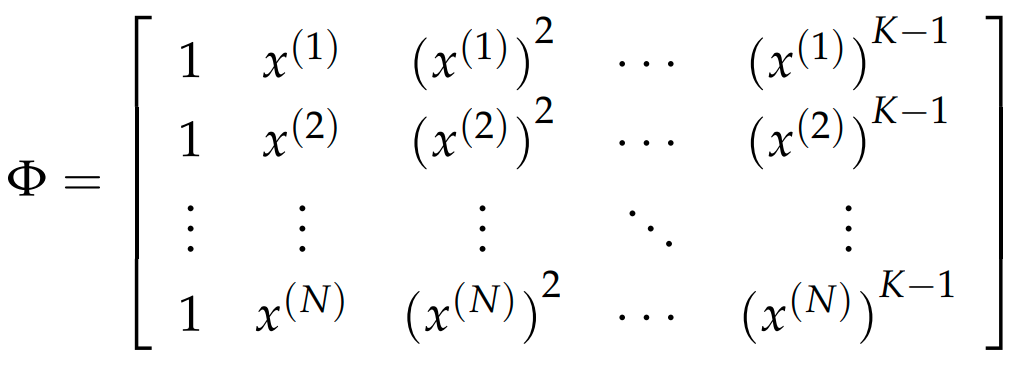


Below you will compute the design matrix $\Phi$ for an artificial dataset.


In [ ]:
import numpy as np

@timeit
def phi_linear_slow(X: np.ndarray) -> np.ndarray:
  """Naive linear basis function."""
  new_linear_array = []
  for x in X:
      new_x = [1, x]
      new_linear_array.append(new_x)


  new_linear_array = np.array(new_linear_array)
  return new_linear_array

@timeit
def phi_quadratic_slow(X: np.ndarray) -> np.ndarray:
  """Naive quadratic basis function."""
  new_quadratic_array = []

  for x in X:
      new_x = [1, x, x**2]
      new_quadratic_array.append(new_x)

  new_quadratic_array = np.array(new_quadratic_array)
  return new_quadratic_array

@timeit
def phi_cube_slow(X: np.ndarray) -> np.ndarray:
  """Naive cube basis function."""
  new_quadratic_array = []

  for x in X:
      new_x = [1, x, x**2, x**3]
      new_quadratic_array.append(new_x)

  new_quadratic_array = np.array(new_quadratic_array)
  return new_quadratic_array

@timeit
def phi_linear_fast(X):
    raise NotImplementedError()

@timeit
def phi_quadratic_fast(X):
    raise NotImplementedError()

@timeit
def phi_cube_fast(X):
    raise NotImplementedError()

@timeit
def phi_polynomial_fast(X, k=4):
    raise NotImplementedError()


data = _create_array(100)

linear_slow = phi_linear_slow(data)
linear = phi_linear_fast(data)
assert np.allclose(linear, linear_slow)

quadratic_slow = phi_quadratic_slow(data)
quadratic = phi_quadratic_fast(data)
assert np.allclose(quadratic, quadratic_slow)

cube_slow = phi_cube_slow(data)
cube = phi_cube_fast(data)
assert np.allclose(cube, cube_slow)